In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from scipy.special import jv 
from itertools import product
from scipy import real
from operator import itemgetter

def cquad(func, a, b, **kwargs):
    def real_func(x, *args):
        return np.real(func(x, *args))
    def imag_func(x, *args):
        return np.imag(func(x, *args))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], 'Hey Boi')

In [149]:
# Parameters
TI_emu = (3,1)

data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi,  'w' : 1, 'm0' : 4*pi*10**(-7)}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["m2"] = TI_emu[1]
data1["e2"] = TI_emu[0]
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['scale'] = 1

data0 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0,  'w' : 1, 'm0' : 4*pi*10**(-7)}
data0['w'] = data0['c']*2*pi/(600*10**(-9))
data0["m2"] = TI_emu[1]
data0["e2"] = TI_emu[0]
data0["delta"] = data0["alpha"]*data0["m1"]*data0["m2"]*(data0["theta2"] - data0["theta1"])/pi
data0["k1"] = data0["n1"]*data0["w"]/data0["c"]
data0["n2"] = np.sqrt(data0['e2']*data0['m2'])
data0["k2"] = data0["n2"]*data0["w"]/data0["c"]
data0['scale'] = 1 

# 3-Layers Air/TI/Mu
dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1, 'm0' : 4*pi*10**(-7)}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e2"] = TI_emu[0]
dataMu2["m2"] = TI_emu[1]
dataMu2["n2"] = np.sqrt(dataMu2["m2"]*dataMu2["e2"])
dataMu2["e3"] = 1
dataMu2["m3"] = 10**5
dataMu2["n3"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

#STRENGTH_FACTOR 
SF = ((0.6)**2)*(10**(-12))

In [150]:
# Fresnel Coeff 2-Layers 
def Rtmtm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Rtetm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return np.abs(thingy)**2

def Rtete(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Rtmte(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return np.abs(thingy)**2
    return thingy

def Ttmtm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttetm(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttmte(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

def Ttete(kp, data=data1, display=False): 
    e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w = data['e1'], data['e2'], data['k1'], data['k2'], data['m1'], data['m2'], data['n1'], data['n2'], data['delta'], data['c'], data['w']
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    if display: return (((np.sqrt(k2**2-kp**2))/(np.sqrt(k1**2-kp**2)))*(m1/m2))*np.abs(thingy)**2
    return thingy

rtmtm = np.vectorize(Rtmtm)
rtetm = np.vectorize(Rtetm)
rtmte = np.vectorize(Rtmte)
rtete = np.vectorize(Rtete)
ttmtm = np.vectorize(Ttmtm)
ttetm = np.vectorize(Ttetm)
ttmte = np.vectorize(Ttmte)
ttete = np.vectorize(Ttete)

In [151]:
# Fresnel Coeff 3-Layers 
def ReflectiveMatrix(kp, data=data1):
    return np.array([[Rtete(kp, data=data), Rtetm(kp, data=data)], [Rtmte(kp, data=data), Rtmtm(kp, data=data)]])

def TransmisiveMatrix(kp, data=data1):
    return np.array([[Ttete(kp, data=data), Ttetm(kp, data=data)], [Ttmte(kp, data=data), Ttmtm(kp, data=data)]])

def VelocityMatrix(kp, data=data1):
    k1,k2,k3,n1,n2,n3,e1,e2,e3,m1,m2,m3,alpha,theta1,theta2,theta3,dist12,dist23 = itemgetter('k1','k2','k3','n1','n2','n3','e1','e2','e3','m1','m2','m3','alpha','theta1','theta2','theta3','dist12','dist23')(data)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    data21 = data.copy()
    data21.update({'e1':e2, 'e2':e1, 'k1':k2, 'k2':k1, 'm1':m2, 'm2':m1, 'n1':n2, 'n2':n1, 'delta':delta21})
    data23 = data.copy()
    data23.update({'e1':e2, 'e2':e3, 'k1':k2, 'k2':k3, 'm1':m2, 'm2':m3, 'n1':n2, 'n2':n3, 'delta':delta23})
    r21 = ReflectiveMatrix(kp, data21)
    r23 = ReflectiveMatrix(kp, data23)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, data=data1):
    k1,k2,k3,n1,n2,n3,e1,e2,e3,m1,m2,m3,alpha,theta1,theta2,theta3,dist12,dist23 = itemgetter('k1','k2','k3','n1','n2','n3','e1','e2','e3','m1','m2','m3','alpha','theta1','theta2','theta3','dist12','dist23')(data)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    data12 = data.copy()
    data12.update({'e1':e1, 'e2':e2, 'k1':k1, 'k2':k2, 'm1':m1, 'm2':m2, 'n1':n1, 'n2':n2, 'delta':delta12})
    data23 = data.copy()
    data23.update({'e1':e2, 'e2':e3, 'k1':k2, 'k2':k3, 'm1':m2, 'm2':m3, 'n1':n2, 'n2':n3, 'delta':delta23})
    data21 = data.copy()
    data21.update({'e1':e2, 'e2':e1, 'k1':k2, 'k2':k1, 'm1':m2, 'm2':m1, 'n1':n2, 'n2':n1, 'delta':delta21})

    r12 = ReflectiveMatrix(kp, data12)
    t21 = TransmisiveMatrix(kp, data21)
    r23 = ReflectiveMatrix(kp, data23)
    M = np.linalg.inv(VelocityMatrix(kp, data))
    t12 = TransmisiveMatrix(kp, data12)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[0,0]
    if display: return np.abs(thingy)**2
    return thingy

def RtetmMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[0,1]
    if display: return np.abs(thingy)**2
    return thingy

def RtmtmMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[1,1]
    if display: return np.abs(thingy)**2
    return thingy

def RtmteMU(kp, data=dataMu2, display=False):
    thingy = ThreeLayerReflexive(kp, data)[1,0]
    if display: return np.abs(thingy)**2
    return thingy

rtmtmMU = np.vectorize(RtmtmMU)
rtetmMU = np.vectorize(RtetmMU)
rtmteMU = np.vectorize(RtmteMU)
rteteMU = np.vectorize(RteteMU)

In [152]:
#G0
def G0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    thing = np.e**(1j*k*R)/(4*pi*R)*((1 + (1j*k*R-1)/(k**2*R**2))*Id+ (3-3j*k*R-k**2*R**2)/(k**2*R**4)*np.outer(Rv,Rv))
    return thing

def G0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    thing = G0(x,y,z,zp=zp,data=data)[0,0]
    if abs(thing) >= 10**(9): return 0
    return thing

def G0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,0]

def G0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,0]

def G0_xy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[0,1]

def G0_yy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,1]

def G0_zy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,1]

def G0_xz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[0,2]

def G0_yz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,2]

def G0_zz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,2]

G0zz = np.vectorize(G0_zz)
G0yz = np.vectorize(G0_yz)
G0xz = np.vectorize(G0_xz)
G0xx = np.vectorize(G0_xx)
G0yx = np.vectorize(G0_yx)
G0zx = np.vectorize(G0_zx)
G0xy = np.vectorize(G0_xy)
G0yy = np.vectorize(G0_yy)
G0zy = np.vectorize(G0_zy)

In [153]:
# Green 2-Layers
def GRzz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return (1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data)

def GRyz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data)

def GRxz_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data)
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm

def GRxx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data)
    rtete = Rtete(kp, data)
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm)

def GRyx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data)
    rtmte = Rtmte(kp, data)
    k1 = data["k1"]
    return (-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte)

def GRzx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data)
    k1 = data["k1"]
    return (-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm

def GRyy_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data)
    rtete = Rtete(kp, data)
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm)

def GRxy_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data)
    rtmte = Rtmte(kp, data)
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte)

def GRzy_integrand(kp, x, y, z, zp, data=data1):
    rtmte = Rtmte(kp, data)
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte

def G_xz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

Gzz = np.vectorize(G_zz)
Gyz = np.vectorize(G_yz)
Gxz = np.vectorize(G_xz)
Gxx = np.vectorize(G_xx)
Gyx = np.vectorize(G_yx)
Gzx = np.vectorize(G_zx)
Gxy = np.vectorize(G_xy)
Gyy = np.vectorize(G_yy)
Gzy = np.vectorize(G_zy)

In [154]:
#M0
def M0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    return (np.e**(1j*k*R)/(4*pi*R))*(1j*k-1/R)*np.cross(Rv/R,Id)

def M0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[0,0]

def M0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[1,0]

def M0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[2,0]

M0xx = np.vectorize(G0_xx)
M0yx = np.vectorize(G0_yx)
M0zx = np.vectorize(G0_zx)

In [155]:
#Magnetic Field 2 Layers 
def MRxx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data)
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*(jv(0,kp*np.sqrt(x**2+y**2))-(kp**2/(k1*np.sqrt(k1**2-kp**2)))*jv(2,kp*np.sqrt(x**2+y**2)))*kp*rtetm

def MRyx_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    kz = np.sqrt(k1**2-kp**2)
    rtete = Rtete(kp, data)
    rtmtm = Rtmtm(kp, data)
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*kp*(rtete-rtmtm) + jv(2,kp*np.sqrt(x**2+y**2))*rtmtm*(2*kp*kz**2/k1**2))

def MRzx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data)
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/np.sqrt(k1**2-kp**2)**2)*rtetm


def M_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def M_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def M_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

In [156]:
def S0_dipole(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return s

S0v_dipole = np.vectorize(S0_dipole, otypes=[list])

def S_dipole(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    if not any([x,y,z-zp]): return 0
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data)+M_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data)+M_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)+M_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data)+G_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data)+G_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)+G_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return -s#/np.linalg.norm(s)

Sv_dipole = np.vectorize(S_dipole, otypes=[list])

In [157]:
r = 3
p = 30
par = 2*r/p
zc = 1.5*(600*10**(-9))
zp = 1*(600*10**(-9))
xs = np.arange(-r, r+par, par)*(600*10**(-9))
ys = np.arange(-r, r+par, par)*(600*10**(-9))
x,y = np.meshgrid(xs,ys)

s0_values = S0v_dipole(x, y, zc, zp=zp, data=data1)

Text(0, 0.5, '$\\hat{k}$')

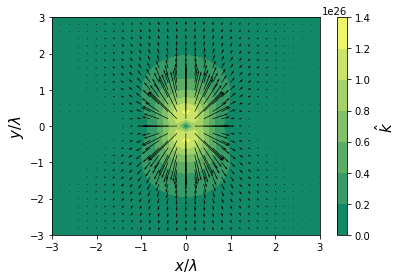

In [158]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = -s0_values*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = [[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values]
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$\hat{k}$', size=15)

Text(0, 0.5, '$|\\hat{k}_\\theta-\\hat{k}_0|$')

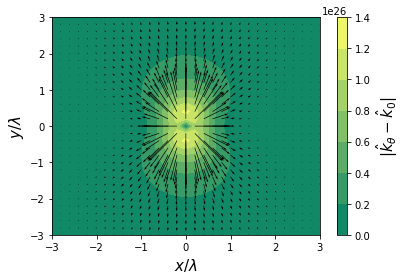

In [159]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = -s0_values*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**(33)
mask2 = new_norms<10**(33)
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)
# fig.savefig('poynting_other/Poynting Dipole Diff Masked ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

In [160]:
s_values = Sv_dipole(x, y, zc, zp=zp, data=data1)
s_values_notopo = Sv_dipole(x, y, zc, zp=zp, data=data0) 

<ipython-input-132-278494b5f107>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


Text(0, 0.5, '$|\\hat{k}_\\theta-\\hat{k}_0|$')

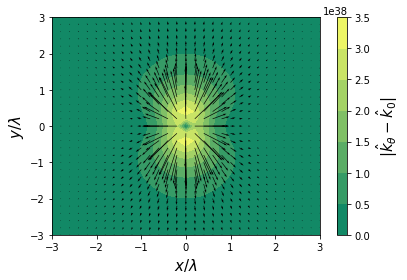

In [161]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = s_values_notopo
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values])
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)

In [162]:
s0_norms = np.array([[np.linalg.norm([v[0],v[1]]) for v in row] for row in s_values_notopo])

mask = s0_norms>10**(70)
mask2 = s0_norms<10**(70)
masked_new_norms = np.ma.array(s0_norms, mask=mask)

normalization_factor = np.mean(masked_new_norms)

Text(0, 0.5, '$|\\hat{k}_\\theta-\\hat{k}_0|$')

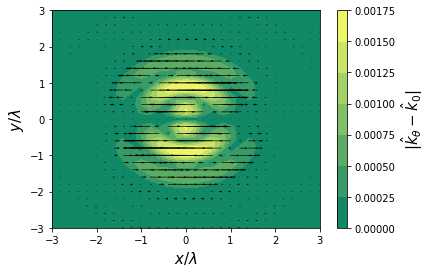

In [163]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values - s_values_notopo)/normalization_factor#*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values])
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)

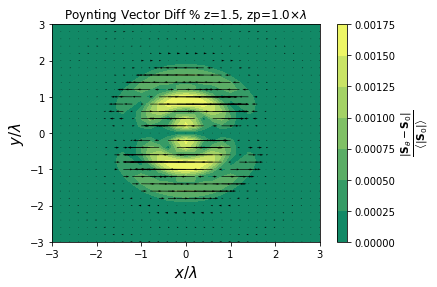

In [164]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values - s_values_notopo)/normalization_factor#*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**(20)
mask2 = new_norms<10**(20)
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
ax.set_title(r'Poynting Vector Diff % z={}, zp={}$\times\lambda$ '.format(zc/(600*10**(-9)), zp/(600*10**(-9))))
cb.ax.set_ylabel(r'$\frac{|\mathbf{S}_\theta-\mathbf{S}_0|}{\left<|{\mathbf{S}_0}|\right>}$', size=15)
fig.savefig('Plots Scan/Poynt_diff_%_z={},zp={}.png'.format(zc/(600*10**(-9)), zp/(600*10**(-9))), bbox_inches='tight')